In [1]:
import os
import json
import requests
from tqdm import tqdm  # Progress bar

# File paths
INPUT_FILE = "../data/mint/species_human.txt"  # https://mint.bio.uniroma2.it/index.php/download/
CACHE_FILE = "protein_sequences.json"
FASTA_FILE = "protein_sequences.fasta"
UNIPROT_API = "https://rest.uniprot.org/uniprotkb/{}.fasta"
SAVE_EVERY = 50  # Save cache after every 50 sequences

def load_cache():
    """Load cached sequences from a JSON file if it exists."""
    if os.path.exists(CACHE_FILE):
        with open(CACHE_FILE, "r") as f:
            return json.load(f)
    return {}

def save_cache(cache):
    """Save updated sequences to the cache file."""
    with open(CACHE_FILE, "w") as f:
        json.dump(cache, f, indent=4)

def fetch_uniprot_sequence(uniprot_id, cache):
    """Fetch a sequence from UniProt, using cache if available."""
    if uniprot_id in cache:
        print(f'Found {uniprot_id} in cache.')
        return cache[uniprot_id]  # Return cached sequence
    
    url = UNIPROT_API.format(uniprot_id)
    response = requests.get(url)
    
    if response.status_code == 200:
        lines = response.text.split("\n")
        sequence = "".join(lines[1:])  # Remove FASTA header
        cache[uniprot_id] = sequence  # Update cache
        return sequence
    else:
        print(f"⚠️ Failed to fetch sequence for {uniprot_id}")
        return None

# Load existing cache
sequence_cache = load_cache()

# Read UniProt IDs from file
uniprot_ids = set()
with open(INPUT_FILE, "r") as file:
    for line in file:
        columns = line.strip().split("\t")
        for col in columns[:2]:  # First two columns contain UniProtKB IDs
            if col.startswith("uniprotkb:"):
                uniprot_ids.add(col.split(":")[1])

# Filter out already cached IDs
unprocessed_ids = [uid for uid in uniprot_ids if uid not in sequence_cache]

# Fetch and store sequences with progress bar
sequences = {}
for i, uid in enumerate(tqdm(unprocessed_ids, desc="Fetching Sequences", unit="protein")):
    sequences[uid] = fetch_uniprot_sequence(uid, sequence_cache)
    
    # Save cache every 50 sequences
    if (i + 1) % SAVE_EVERY == 0:
        save_cache(sequence_cache)
        print(f"💾 Saved cache after {i + 1} sequences")

# Final save
save_cache(sequence_cache)

# Write sequences to a FASTA file
with open(FASTA_FILE, "w") as fasta_file:
    for uid, seq in sequence_cache.items():
        if seq:
            fasta_file.write(f">{uid}\n{seq}\n")

print(f"✅ FASTA file saved as {FASTA_FILE}")
print(f"✅ Cached sequences saved as {CACHE_FILE}")


Fetching Sequences:   2%|██                                                                                                                               | 1/63 [00:00<00:13,  4.50protein/s]

⚠️ Failed to fetch sequence for Q9WMX2-PRO_0000037550


Fetching Sequences:   3%|████                                                                                                                             | 2/63 [00:00<00:12,  4.72protein/s]

⚠️ Failed to fetch sequence for P61278-PRO_0000033087


Fetching Sequences:   6%|████████▏                                                                                                                        | 4/63 [00:00<00:11,  4.95protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449628
⚠️ Failed to fetch sequence for P12643-PRO_0000033824


Fetching Sequences:   8%|██████████▏                                                                                                                      | 5/63 [00:01<00:11,  4.92protein/s]

⚠️ Failed to fetch sequence for O43464-PRO_0000026946


Fetching Sequences:  10%|████████████▎                                                                                                                    | 6/63 [00:01<00:11,  4.82protein/s]

⚠️ Failed to fetch sequence for P08563-PRO_0000041303


Fetching Sequences:  11%|██████████████▎                                                                                                                  | 7/63 [00:01<00:14,  3.88protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449621


Fetching Sequences:  13%|████████████████▍                                                                                                                | 8/63 [00:01<00:16,  3.41protein/s]

⚠️ Failed to fetch sequence for P00734-PRO_0000028160


Fetching Sequences:  14%|██████████████████▍                                                                                                              | 9/63 [00:03<00:31,  1.71protein/s]

⚠️ Failed to fetch sequence for O91464-PRO_0000448014


Fetching Sequences:  16%|████████████████████▎                                                                                                           | 10/63 [00:03<00:24,  2.14protein/s]

⚠️ Failed to fetch sequence for P0C6X9-PRO_0000037352


Fetching Sequences:  19%|████████████████████████▍                                                                                                       | 12/63 [00:03<00:16,  3.02protein/s]

⚠️ Failed to fetch sequence for P01008-PRO_0000032489
⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037314


Fetching Sequences:  22%|████████████████████████████▍                                                                                                   | 14/63 [00:04<00:13,  3.74protein/s]

⚠️ Failed to fetch sequence for Q9Z0X1-PRO_0000022031
⚠️ Failed to fetch sequence for Q9WMX2-PRO_0000037541


Fetching Sequences:  24%|██████████████████████████████▍                                                                                                 | 15/63 [00:04<00:11,  4.06protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449625


Fetching Sequences:  27%|██████████████████████████████████▌                                                                                             | 17/63 [00:04<00:10,  4.45protein/s]

⚠️ Failed to fetch sequence for P14335-PRO_0000037710
⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449623


Fetching Sequences:  29%|████████████████████████████████████▌                                                                                           | 18/63 [00:05<00:09,  4.60protein/s]

⚠️ Failed to fetch sequence for P12643-PRO_0000033825


Fetching Sequences:  30%|██████████████████████████████████████▌                                                                                         | 19/63 [00:05<00:09,  4.68protein/s]

⚠️ Failed to fetch sequence for P14335-PRO_0000037713


Fetching Sequences:  32%|████████████████████████████████████████▋                                                                                       | 20/63 [00:05<00:10,  4.07protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000283841


Fetching Sequences:  35%|████████████████████████████████████████████▋                                                                                   | 22/63 [00:05<00:09,  4.44protein/s]

⚠️ Failed to fetch sequence for Q14118-PRO_0000021066
⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037319


Fetching Sequences:  37%|██████████████████████████████████████████████▋                                                                                 | 23/63 [00:06<00:09,  4.41protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449633


Fetching Sequences:  38%|████████████████████████████████████████████████▊                                                                               | 24/63 [00:06<00:10,  3.68protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449630


Fetching Sequences:  41%|████████████████████████████████████████████████████▊                                                                           | 26/63 [00:07<00:08,  4.21protein/s]

⚠️ Failed to fetch sequence for Q9WMX2-PRO_0000037551
⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037316


Fetching Sequences:  43%|██████████████████████████████████████████████████████▊                                                                         | 27/63 [00:07<00:08,  4.43protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449624


Fetching Sequences:  46%|██████████████████████████████████████████████████████████▉                                                                     | 29/63 [00:07<00:07,  4.71protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037315
⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037320


Fetching Sequences:  48%|████████████████████████████████████████████████████████████▉                                                                   | 30/63 [00:07<00:07,  4.60protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037310


Fetching Sequences:  49%|██████████████████████████████████████████████████████████████▉                                                                 | 31/63 [00:08<00:07,  4.16protein/s]

⚠️ Failed to fetch sequence for P19838-PRO_0000030311


Fetching Sequences:  51%|█████████████████████████████████████████████████████████████████                                                               | 32/63 [00:08<00:07,  4.26protein/s]

⚠️ Failed to fetch sequence for P61278-PRO_0000033088


Fetching Sequences:  52%|███████████████████████████████████████████████████████████████████                                                             | 33/63 [00:08<00:09,  3.31protein/s]

⚠️ Failed to fetch sequence for Q9WMX2-PRO_0000037547


Fetching Sequences:  56%|███████████████████████████████████████████████████████████████████████                                                         | 35/63 [00:09<00:08,  3.32protein/s]

⚠️ Failed to fetch sequence for Q969J5-PRO_0000011016
⚠️ Failed to fetch sequence for P08563-PRO_0000041302


Fetching Sequences:  57%|█████████████████████████████████████████████████████████████████████████▏                                                      | 36/63 [00:09<00:07,  3.61protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037309


Fetching Sequences:  59%|███████████████████████████████████████████████████████████████████████████▏                                                    | 37/63 [00:09<00:06,  3.88protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449622


Fetching Sequences:  62%|███████████████████████████████████████████████████████████████████████████████▏                                                | 39/63 [00:10<00:05,  4.40protein/s]

⚠️ Failed to fetch sequence for Q86500-PRO_0000041225
⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449631


Fetching Sequences:  65%|███████████████████████████████████████████████████████████████████████████████████▎                                            | 41/63 [00:10<00:04,  4.71protein/s]

⚠️ Failed to fetch sequence for P14340-PRO_0000037965
⚠️ Failed to fetch sequence for Q9GZX6-PRO_0000015383


Fetching Sequences:  67%|█████████████████████████████████████████████████████████████████████████████████████▎                                          | 42/63 [00:10<00:04,  4.79protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449627


Fetching Sequences:  68%|███████████████████████████████████████████████████████████████████████████████████████▎                                        | 43/63 [00:11<00:04,  4.68protein/s]

⚠️ Failed to fetch sequence for Q9WMX2-PRO_0000037552


Fetching Sequences:  70%|█████████████████████████████████████████████████████████████████████████████████████████▍                                      | 44/63 [00:11<00:04,  4.61protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449632


Fetching Sequences:  71%|███████████████████████████████████████████████████████████████████████████████████████████▍                                    | 45/63 [00:11<00:03,  4.64protein/s]

⚠️ Failed to fetch sequence for Q86500-PRO_0000041224


Fetching Sequences:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 46/63 [00:11<00:03,  4.66protein/s]

⚠️ Failed to fetch sequence for O91464-PRO_0000448015


Fetching Sequences:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 48/63 [00:12<00:03,  4.76protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037312
⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449629


Fetching Sequences:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 49/63 [00:12<00:02,  4.76protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449620


Fetching Sequences:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 50/63 [00:12<00:03,  4.26protein/s]

⚠️ Failed to fetch sequence for P00742-PRO_0000027787
💾 Saved cache after 50 sequences


Fetching Sequences:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 51/63 [00:12<00:02,  4.59protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449626


Fetching Sequences:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 53/63 [00:13<00:02,  4.73protein/s]

⚠️ Failed to fetch sequence for P0DTD1-PRO_0000449619
⚠️ Failed to fetch sequence for Q9BXJ0-PRO_0000003535


Fetching Sequences:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 54/63 [00:13<00:01,  4.79protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037322


Fetching Sequences:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 55/63 [00:13<00:02,  3.39protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037313


Fetching Sequences:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 56/63 [00:15<00:04,  1.60protein/s]

⚠️ Failed to fetch sequence for P10071-PRO_0000406137


Fetching Sequences:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 57/63 [00:15<00:03,  1.97protein/s]

⚠️ Failed to fetch sequence for O91464-PRO_0000448012


Fetching Sequences:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 58/63 [00:15<00:02,  2.40protein/s]

⚠️ Failed to fetch sequence for P01024-PRO_0000005911


Fetching Sequences:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 60/63 [00:16<00:00,  3.27protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037311
⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037318


Fetching Sequences:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 61/63 [00:16<00:00,  3.64protein/s]

⚠️ Failed to fetch sequence for Q99757-PRO_0000034150


Fetching Sequences:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 62/63 [00:16<00:00,  3.87protein/s]

⚠️ Failed to fetch sequence for P0C6X7-PRO_0000037321


Fetching Sequences: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:16<00:00,  3.74protein/s]

⚠️ Failed to fetch sequence for P08563-PRO_0000041304
✅ FASTA file saved as protein_sequences.fasta
✅ Cached sequences saved as protein_sequences.json


Processing rows: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76465/76465 [00:00<00:00, 278591.62it/s]


Skipping row due to conversion error: uniprotkb:O14757	-	intact:EBI-974488|uniprotkb:B4DDD0|uniprotkb:F5H7S4|uniprotkb:A8K934|uniprotkb:B4DSK3|uniprotkb:B5BTY6|uniprotkb:H2BI51|ensembl:ENSP00000388648.1|ensembl:ENSP00000412504.2|ensembl:ENSP00000432890.1|ensembl:ENSP00000435371.1|ensembl:ENSP00000481616.2	-	psi-mi:chk1_human(display_long)|uniprotkb:CHEK1(gene name)|psi-mi:CHEK1(display_short)|uniprotkb:CHK1(gene name synonym)|uniprotkb:CHK1 checkpoint homolog(gene name synonym)|uniprotkb:Checkpoint kinase-1(gene name synonym)|uniprotkb:Cell cycle checkpoint kinase(gene name synonym)	-	psi-mi:"MI:0424"(protein kinase assay)	Okita et al. (2012)	pubmed:23068608|mint:MINT-8393704	taxid:9606(human)|taxid:9606(Homo sapiens)	-	psi-mi:"MI:0217"(phosphorylation reaction)	psi-mi:"MI:0471"(MINT)	intact:EBI-8086436|mint:MINT-8394892	-
Skipping row due to conversion error: uniprotkb:O14757	-	intact:EBI-974488|uniprotkb:B4DDD0|uniprotkb:F5H7S4|uniprotkb:A8K934|uniprotkb:B4DSK3|uniprotkb:B5BTY6|unipr

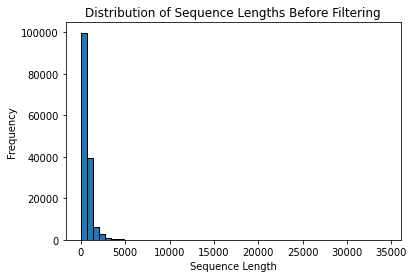

Total number of pairs processed: 76454
Number of pairs removed due to missing sequences: 1338
Number of pairs removed due to length > 1024: 22944
Number of pairs removed due to conversion errors: 11


In [2]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset, DatasetDict
from huggingface_hub import HfApi
from tqdm import tqdm

# Input and output file paths
output_file_train = "../data/mint/mint_train_dataset.csv"
output_file_test = "../data/mint/mint_test_dataset.csv"

data = []
sequence_lengths = []
all_pairs = []
not_found_count = 0
conversion_error_count = 0

data_total = 0
with open(INPUT_FILE, "r") as f:
    lines = f.readlines()
    for line in tqdm(lines, desc="Processing rows"):
        cols = line.strip().split("\t")
        uniprot1 = cols[0].split(":")[-1]
        uniprot2 = cols[1].split(":")[-1]
        
        try:
            intact_score = float(cols[-1].split(":")[-1])
        except ValueError:
            print(f"Skipping row due to conversion error: {line.strip()}")
            conversion_error_count += 1
            continue
        
        seq1 = sequence_cache.get(uniprot1, "")
        seq2 = sequence_cache.get(uniprot2, "")
        
        data_total += 1
        if not seq1 or not seq2:
            not_found_count += 1
            continue
        
        seq_len1 = len(seq1)
        seq_len2 = len(seq2)
        sequence_lengths.append(seq_len1)
        sequence_lengths.append(seq_len2)
        all_pairs.append((seq1, seq2, uniprot1, uniprot2, intact_score, seq_len1, seq_len2))

# Plot sequence length distribution before filtering
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths Before Filtering')
plt.show()

# Filter out sequences longer than 1024
filtered_pairs = [pair for pair in all_pairs if pair[5] <= 1024 and pair[6] <= 1024]
num_removed = len(all_pairs) - len(filtered_pairs)
print(f"Total number of pairs processed: {data_total}")
print(f"Number of pairs removed due to missing sequences: {not_found_count}")
print(f"Number of pairs removed due to length > 1024: {num_removed}")
print(f"Number of pairs removed due to conversion errors: {conversion_error_count}")

# Convert filtered data to Pandas DataFrame
df = pd.DataFrame(filtered_pairs, columns=["sequence_1", "sequence_2", "uniprot_1", "uniprot_2", "intact_miscore", "seq_len1", "seq_len2"])
df = df.drop(columns=["seq_len1", "seq_len2"])  # Drop length columns after filtering

# Perform 80/20 train-test split
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle data
split_idx = int(0.8 * len(df))
df_train = df.iloc[:split_idx]
df_test = df.iloc[split_idx:]

# Save train and test sets as CSV with headers
df_train.to_csv(output_file_train, index=False)
df_test.to_csv(output_file_test, index=False)

# Convert to Hugging Face dataset
dataset_dict = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "test": Dataset.from_pandas(df_test)
})

dataset_dict.push_to_hub("vladak/mint")